In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("StudentsPerformance.csv")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
754,male,group C,associate's degree,free/reduced,none,58,55,53
84,male,group D,high school,free/reduced,none,42,39,34
164,female,group E,master's degree,standard,none,81,92,91
159,male,group D,associate's degree,free/reduced,none,66,62,64
872,male,group B,associate's degree,standard,completed,82,84,78
652,female,group D,some college,standard,completed,85,86,98
858,male,group B,high school,standard,completed,52,49,46
778,female,group A,some college,standard,completed,72,79,82
957,female,group D,master's degree,standard,none,92,100,100
713,male,group D,master's degree,standard,none,81,81,84


In [6]:
df.sample(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
245,male,group C,associate's degree,standard,none,85,76,71
126,male,group B,some high school,standard,none,72,68,67
297,male,group E,associate's degree,standard,completed,71,74,68
393,male,group C,associate's degree,standard,completed,57,54,56
967,male,group C,some college,standard,none,63,63,60
722,female,group B,some high school,free/reduced,completed,74,90,88
823,female,group B,high school,free/reduced,none,71,87,82
600,female,group D,master's degree,standard,none,54,60,63
583,female,group D,associate's degree,standard,completed,73,75,80
250,male,group A,some high school,standard,completed,47,49,49


In [7]:
print(pd.isnull(df).sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [15]:
##Sprate out male and female from the gender 
count_A = df['gender'].value_counts()
print(count_A)

female    518
male      482
Name: gender, dtype: int64


In [17]:
count_B = df['race/ethnicity'].value_counts()
print(count_B)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


In [21]:
count_C = df['parental level of education'].value_counts()
count_C

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [22]:
count_D = df['test preparation course'].value_counts()
count_D

none         642
completed    358
Name: test preparation course, dtype: int64

In [26]:
num_desc = df.describe(include=[np.number])
num_desc 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [40]:


# Average of Total score 
average_score = (df["math score"] + df["reading score"] + df["writing score"]) / 3
rounded_score = round(average_score, 2)
a = df["Total_score"] = rounded_score
a


0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Length: 1000, dtype: float64

In [76]:
Passing_mark = 50

# Average of Total score 

df["Total_score"] = round((df["math score"] + df["reading score"] + df["writing score"]) /3 , 2)

In [73]:
df1["Did_pass"] = False
a= df["Did_pass"] = df["Total_score"] > Passing_mark 
a

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Total_score, Length: 1000, dtype: bool

In [81]:
# Add a column for fail and pass

df["Did_pass"] = False
a = df["Did_pass"] = df["Total_score"] > Passing_mark 


In [94]:
##This dataset appears to be highly imbalanced with very few students failing. 
#In order to obtain a more accurate representation of the overall performance of the students, 
#it may be necessary to adjust the passing score to a lower threshold
df["Did_pass"].value_counts()


True     891
False    109
Name: Did_pass, dtype: int64

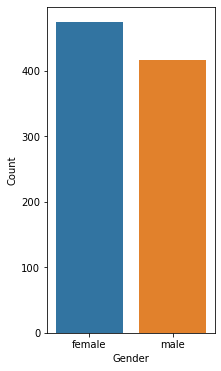

In [85]:
plt.figure(figsize = (3,6))

sns.countplot(x = "gender", data = df[df["Did_pass"] == True])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [86]:
males_who_passed = get_passed("gender", "male", df)
females_who_passed = get_passed("gender", "female", df)
print("Number of males who passed: {}".format(males_who_passed))
print("Number of females who passed: {}".format(females_who_passed))

Number of males who passed: 417
Number of females who passed: 474


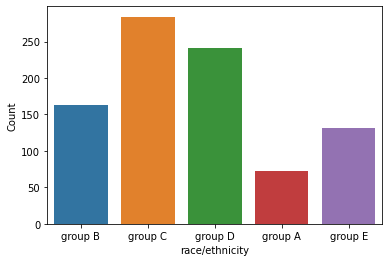

In [87]:
# lets analyze the ethnicity/ race category 
plt.figure(figsize = (6,4))

sns.countplot(x = "race/ethnicity", data = df[df["Did_pass"] == True])
plt.xlabel("race/ethnicity")
plt.ylabel("Count")
plt.show()

In [88]:
for race in df["race/ethnicity"].unique():
    print("Number of people passed, {} are from race: {}".format(race, get_passed("race/ethnicity", race, df)))

Number of people passed, group B are from race: 163
Number of people passed, group C are from race: 284
Number of people passed, group A are from race: 72
Number of people passed, group D are from race: 241
Number of people passed, group E are from race: 131


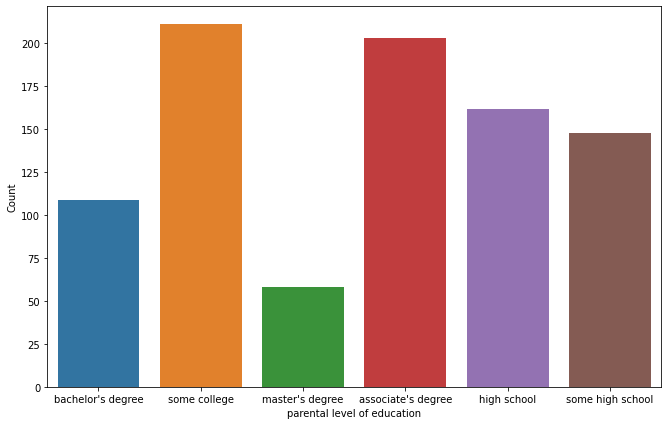

In [89]:
# ploting the graph between parental level of education and student passed

plt.figure(figsize = (11,7))
sns.countplot(x = "parental level of education", data = df[df["Did_pass"] == True])

plt.xlabel("parental level of education")
plt.ylabel("Count")
plt.show()

In [90]:
for edu in df["parental level of education"].unique():
    print("Parents of: {}  passed student are from {}".format(get_passed("parental level of education", edu, df), edu))

Parents of: 109  passed student are from bachelor's degree
Parents of: 211  passed student are from some college
Parents of: 58  passed student are from master's degree
Parents of: 203  passed student are from associate's degree
Parents of: 162  passed student are from high school
Parents of: 148  passed student are from some high school


In [83]:
df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Did_pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True
1,female,group C,some college,standard,completed,69,90,88,82.33,True
2,female,group B,master's degree,standard,none,90,95,93,92.67,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,False
4,male,group C,some college,standard,none,76,78,75,76.33,True
5,female,group B,associate's degree,standard,none,71,83,78,77.33,True
6,female,group B,some college,standard,completed,88,95,92,91.67,True
7,male,group B,some college,free/reduced,none,40,43,39,40.67,False
8,male,group D,high school,free/reduced,completed,64,64,67,65.00,True
9,female,group B,high school,free/reduced,none,38,60,50,49.33,False


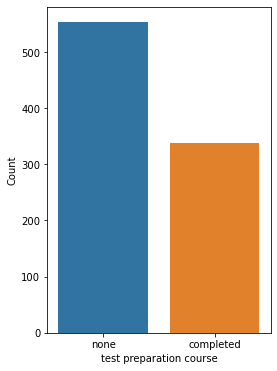

In [91]:
plt.figure(figsize = (4,6))
sns.countplot(x = "test preparation course", data = df[df["Did_pass"] == True])

plt.xlabel("test preparation course")
plt.ylabel("Count")
plt.show()

In [92]:
for edu in df["test preparation course"].unique():
    print("Number of student passed: {} have done {}".format(get_passed("test preparation course", edu, df), edu))

Number of student passed: 553 have done none
Number of student passed: 338 have done completed
